# 📘 3.4.7. Clustering Metrics: An Academic Overview

---

## 🔹 Introduction  

Clustering metrics are evaluation measures used to assess the quality of **unsupervised learning methods** (e.g., k-means, DBSCAN, hierarchical clustering).  

Unlike supervised learning, clustering lacks explicit ground truth labels, making evaluation more challenging.  

- **Internal (intrinsic) metrics** → evaluate cluster structure without ground truth.  
- **External (extrinsic) metrics** → require ground truth labels for validation.  

---

## 🔹 Categories of Metrics  

### 1. Internal Metrics (label-free, structure-based)  

These measure **compactness** and **separation** of clusters based only on the data.  

#### Silhouette Coefficient  

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), \, b(i) \}}
$$  

- $a(i)$ = average intra-cluster distance  
- $b(i)$ = lowest average inter-cluster distance  
- $s(i) \in [-1,1]$ → higher = better clustering  

---

#### Davies–Bouldin Index (DBI)  

$$
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \frac{\sigma_i + \sigma_j}{d(c_i, c_j)}
$$  

- $\sigma_i$ = average distance within cluster $i$  
- $d(c_i, c_j)$ = distance between cluster centroids  
- Lower DBI = better separation  

---

#### Calinski–Harabasz Index (Variance Ratio Criterion)  

$$
CH = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{N-k}{k-1}
$$  

- $B_k$ = between-cluster dispersion  
- $W_k$ = within-cluster dispersion  
- Higher CH = better clustering  

---

### 2. External Metrics (requires true labels)  

These compare clustering assignments to known ground truth.  

#### Rand Index (RI)  

$$
RI = \frac{TP + TN}{TP + FP + FN + TN}
$$  

- Measures pairwise agreement between cluster labels and ground truth  

---

#### Adjusted Rand Index (ARI)  

$$
ARI = \frac{RI - E[RI]}{\max(RI) - E[RI]}
$$  

- Corrects for chance agreement  

---

#### Mutual Information (MI)  

$$
MI(U, V) = \sum_{i=1}^{|U|} \sum_{j=1}^{|V|}
\frac{|U_i \cap V_j|}{N}
\log \frac{N \cdot |U_i \cap V_j|}{|U_i| \cdot |V_j|}
$$  

- Measures information overlap between clustering $U$ and classes $V$  

---

#### Normalized Mutual Information (NMI)  

$$
NMI = \frac{2 \cdot MI(U, V)}{H(U) + H(V)}
$$  

- $H(U)$ = entropy of clustering  
- $NMI \in [0,1]$ → higher = stronger alignment  

---

#### Fowlkes–Mallows Index (FMI)  

$$
FMI = \sqrt{\frac{TP}{TP+FP} \cdot \frac{TP}{TP+FN}}
$$  

- Balances precision and recall of pairwise label agreement  

---

## 🔹 Interpretation & Usage  

- **Internal metrics** → useful for exploratory clustering with no ground truth.  
- **External metrics** → essential when clustering is validated against known labels.  
- **Best practice** → use multiple metrics together to ensure robust evaluation.  

---

## 🔹 Academic References  

- **Davies, D. L., & Bouldin, D. W. (1979).** *A Cluster Separation Measure.* IEEE TPAMI.  
- **Hubert, L., & Arabie, P. (1985).** *Comparing partitions.* Journal of Classification.  
- **Rousseeuw, P. J. (1987).** *Silhouettes: A graphical aid to the interpretation and validation of cluster analysis.* JCAM.  
- **Vinh, N. X., Epps, J., & Bailey, J. (2010).** *Information theoretic measures for clustering comparison: Variants, properties, normalization and correction for chance.* JMLR.  


# 📘 Mathematical & Statistical Formulation of Clustering Metrics

---

## 🔹 1. Intrinsic (Internal) Metrics  

These do not require ground truth labels. They evaluate the **geometry of clusters**.  

---

### 1.1 Silhouette Coefficient  

For a sample $i$:  

- **Intra-cluster distance**:  

$$
a(i) = \frac{1}{|C_i|-1} \sum_{j \in C_i, \, j \neq i} d(x_i, x_j)
$$  

- **Nearest-cluster distance**:  

$$
b(i) = \min_{k \neq i} \frac{1}{|C_k|} \sum_{j \in C_k} d(x_i, x_j)
$$  

- **Silhouette score for sample $i$**:  

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}} \in [-1,1]
$$  

- **Overall score**:  

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$  

---

### 1.2 Calinski–Harabasz Index (CH)  

Ratio of between-cluster to within-cluster dispersion:  

$$
CH = \frac{\text{tr}(B_k) / (k-1)}{\text{tr}(W_k) / (n-k)}
$$  

Where:  

- Between-cluster scatter:  

$$
B_k = \sum_{c=1}^k n_c (\mu_c - \mu)(\mu_c - \mu)^\top
$$  

- Within-cluster scatter:  

$$
W_k = \sum_{c=1}^k \sum_{x_i \in C_c} (x_i - \mu_c)(x_i - \mu_c)^\top
$$  

---

### 1.3 Davies–Bouldin Index (DB)  

Measures **average similarity between clusters**:  

$$
DB = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)} \right)
$$  

Where:  

- Cluster scatter:  

$$
\sigma_i = \frac{1}{|C_i|} \sum_{x \in C_i} d(x, \mu_i)
$$  

- $d(\mu_i, \mu_j)$ = distance between cluster centroids.  

---

## 🔹 2. Extrinsic (External) Metrics  

These require **ground truth labels** $y$ to compare with predicted labels $\hat{y}$.  

---

### 2.1 Adjusted Rand Index (ARI)  

- Let:  
  - $a$ = pairs in same cluster in both $y$ and $\hat{y}$  
  - $b$ = pairs in same cluster in $y$ but not in $\hat{y}$  
  - $c$ = pairs in same cluster in $\hat{y}$ but not in $y$  
  - $d$ = pairs in different clusters in both  

- Rand Index:  

$$
RI = \frac{a+d}{a+b+c+d}
$$  

- Adjusted Rand Index:  

$$
ARI = \frac{RI - E[RI]}{\max(RI) - E[RI]}
$$  

---

### 2.2 Normalized Mutual Information (NMI)  

Mutual Information between clustering $C$ and ground truth $Y$:  

$$
MI(C,Y) = \sum_{i=1}^k \sum_{j=1}^m p(c_i, y_j) \log \frac{p(c_i, y_j)}{p(c_i) \, p(y_j)}
$$  

Normalized form:  

$$
NMI(C,Y) = \frac{2 \cdot MI(C,Y)}{H(C) + H(Y)}
$$  

Where entropy is:  

$$
H(C) = - \sum_i p(c_i) \log p(c_i)
$$  

---

### 2.3 Adjusted Mutual Information (AMI)  

Corrected for chance:  

$$
AMI(C,Y) = \frac{MI(C,Y) - E[MI]}{\max(H(C), H(Y)) - E[MI]}
$$  

---

### 2.4 Homogeneity, Completeness, V-Measure  

- **Homogeneity** (clusters contain only one class):  

$$
h = 1 - \frac{H(Y|C)}{H(Y)}
$$  

- **Completeness** (all members of a class in one cluster):  

$$
c = 1 - \frac{H(C|Y)}{H(C)}
$$  

- **V-Measure** (harmonic mean):  

$$
V = \frac{2 \cdot h \cdot c}{h+c}
$$  

---

### 2.5 Fowlkes–Mallows Index (FMI)  

$$
FMI = \sqrt{\frac{TP}{TP+FP} \cdot \frac{TP}{TP+FN}}
$$  

Where $TP$, $FP$, $FN$ are pairwise counts.  

---

## 📊 Summary of Categories  

- **Intrinsic (unsupervised):** Silhouette, Calinski–Harabasz (CH), Davies–Bouldin (DB).  
- **Extrinsic (supervised):** ARI, NMI, AMI, Homogeneity, Completeness, V-Measure, FMI.  


In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# --- 1. Generate synthetic dataset ---
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.60,
    random_state=42
)

In [6]:
# --- 2. Apply clustering models ---
models = {
    "KMeans": KMeans(n_clusters=4, random_state=42),
    "DBSCAN": DBSCAN(eps=0.8, min_samples=5)
}

results = {}

for name, model in models.items():
    y_pred = model.fit_predict(X)

    # Skip metrics if model produces only noise (e.g., all -1 in DBSCAN)
    if len(set(y_pred)) > 1:
        results[name] = {
            "Silhouette": silhouette_score(X, y_pred),
            "Calinski-Harabasz": calinski_harabasz_score(X, y_pred),
            "Davies-Bouldin": davies_bouldin_score(X, y_pred),
            "Adjusted Rand Index": adjusted_rand_score(y_true, y_pred),
            "Normalized Mutual Info": normalized_mutual_info_score(y_true, y_pred)
        }


In [7]:
# --- 3. Store results in DataFrame ---
df_results = pd.DataFrame(results).T
print("\n=== Clustering Metrics Comparison ===\n")
print(df_results)


=== Clustering Metrics Comparison ===

        Silhouette  Calinski-Harabasz  Davies-Bouldin  Adjusted Rand Index  \
KMeans    0.875732       15874.713413        0.174885             1.000000   
DBSCAN    0.799945       12071.406716        0.219581             0.997335   

        Normalized Mutual Info  
KMeans                1.000000  
DBSCAN                0.995816  


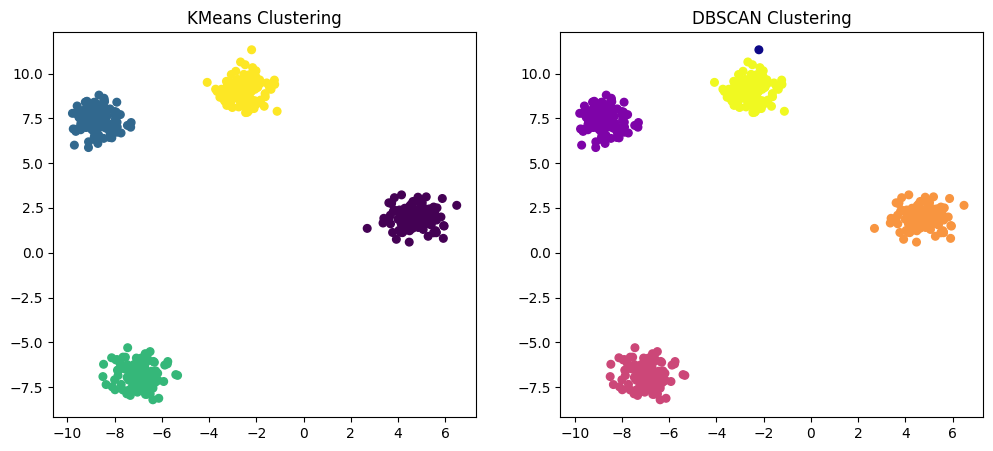

In [8]:
# --- 4. Visualization of clustering results ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(
    X[:, 0], X[:, 1],
    c=models["KMeans"].fit_predict(X),
    cmap="viridis", s=30
)
axes[0].set_title("KMeans Clustering")

axes[1].scatter(
    X[:, 0], X[:, 1],
    c=models["DBSCAN"].fit_predict(X),
    cmap="plasma", s=30
)
axes[1].set_title("DBSCAN Clustering")

plt.show()

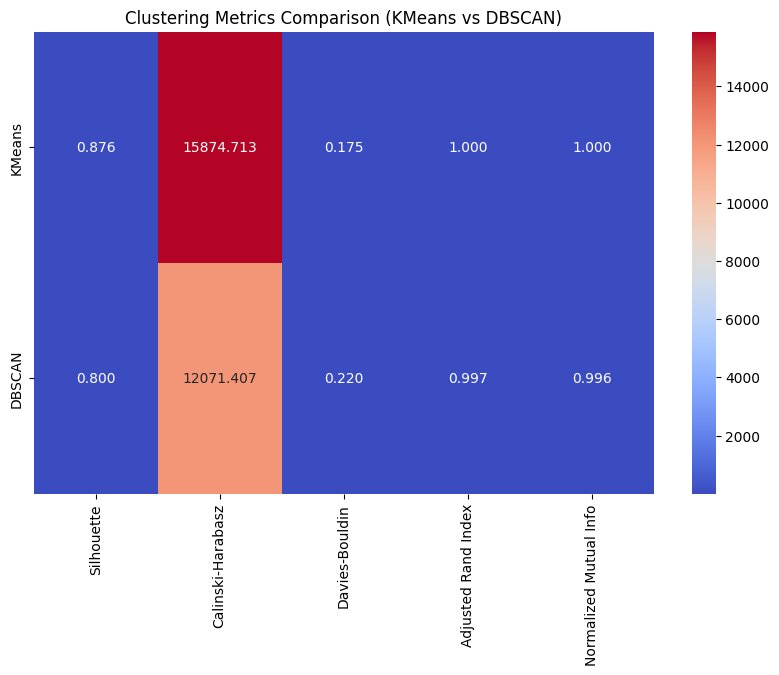

In [9]:
# --- 5. Visualization of metric comparison ---
plt.figure(figsize=(10, 6))
sns.heatmap(df_results, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Clustering Metrics Comparison (KMeans vs DBSCAN)")
plt.show()


In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    fowlkes_mallows_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
# --- 1. Generate synthetic dataset ---
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.60,
    random_state=42
)

In [16]:
# --- 2. Apply clustering models ---
models = {
    "KMeans": KMeans(n_clusters=4, random_state=42),
    "DBSCAN": DBSCAN(eps=0.8, min_samples=5)

}

results = {}

for name, model in models.items():
    y_pred = model.fit_predict(X)

In [18]:
# Skip metrics if model produces only noise (e.g., all -1 in DBSCAN)
if len(set(y_pred)) > 1:
    results[name] = {
        "Silhouette": silhouette_score(X, y_pred),
        "Calinski-Harabasz": calinski_harabasz_score(X, y_pred),
        "Davies-Bouldin": davies_bouldin_score(X, y_pred),
        "Adjusted Rand Index": adjusted_rand_score(y_true, y_pred),
        "Normalized Mutual Info": normalized_mutual_info_score(y_true, y_pred),
        "Adjusted Mutual Info": adjusted_mutual_info_score(y_true, y_pred),
        "Homogeneity": homogeneity_score(y_true, y_pred),
        "Completeness": completeness_score(y_true, y_pred),
        "V-Measure": v_measure_score(y_true, y_pred),
        "Fowlkes-Mallows": fowlkes_mallows_score(y_true, y_pred)
    }

In [19]:
# --- 3. Store results in DataFrame ---
df_results = pd.DataFrame(results).T
print("\n=== Clustering Metrics Comparison (Extended) ===\n")
print(df_results)


=== Clustering Metrics Comparison (Extended) ===

        Silhouette  Calinski-Harabasz  Davies-Bouldin  Adjusted Rand Index  \
DBSCAN    0.799945       12071.406716        0.219581             0.997335   

        Normalized Mutual Info  Adjusted Mutual Info  Homogeneity  \
DBSCAN                0.995816               0.99578          1.0   

        Completeness  V-Measure  Fowlkes-Mallows  
DBSCAN      0.991667   0.995816         0.997998  


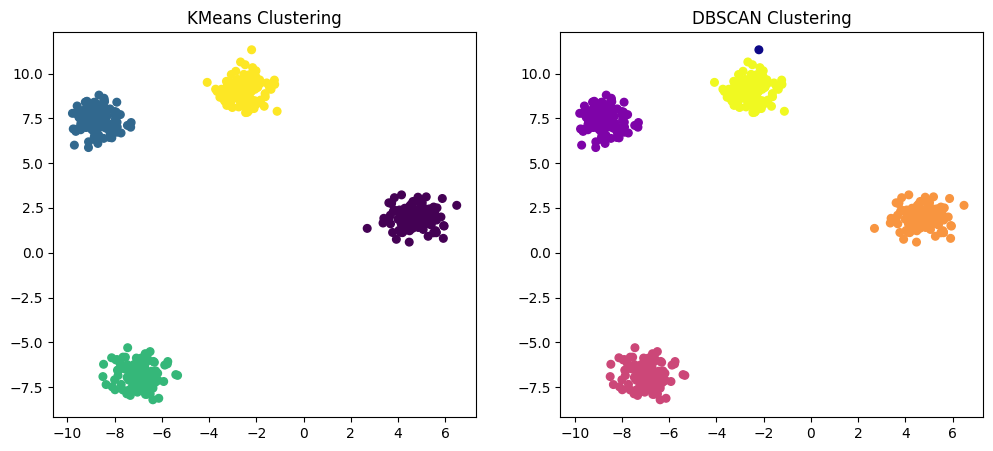

In [20]:
# --- 4. Visualization of clustering results ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(
    X[:, 0], X[:, 1],
    c=models["KMeans"].fit_predict(X),
    cmap="viridis", s=30
)
axes[0].set_title("KMeans Clustering")

axes[1].scatter(
    X[:, 0], X[:, 1],
    c=models["DBSCAN"].fit_predict(X),
    cmap="plasma", s=30
)
axes[1].set_title("DBSCAN Clustering")

plt.show()

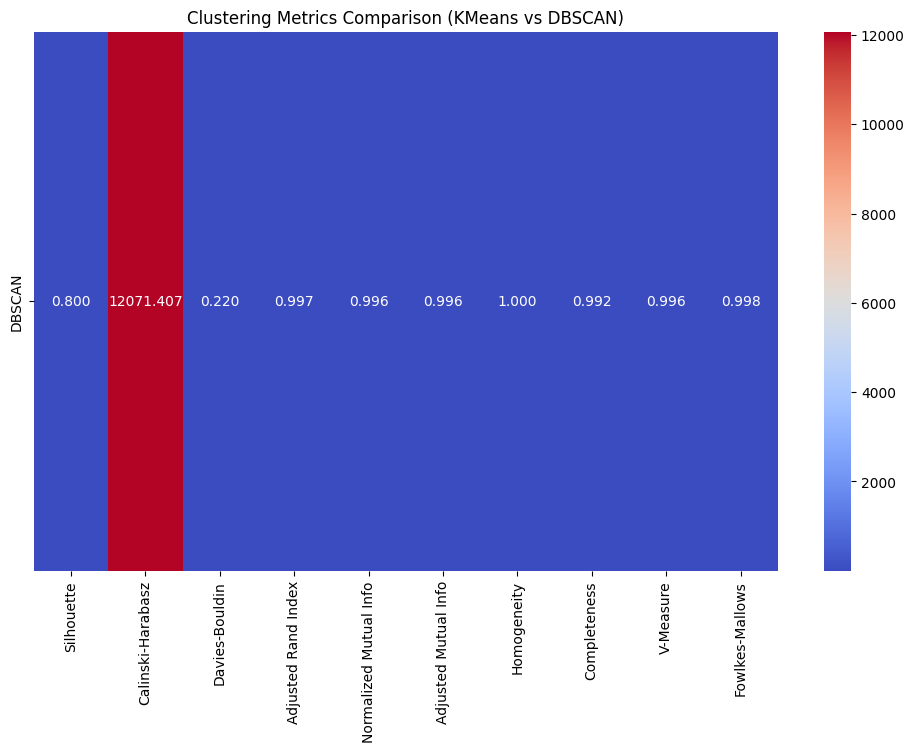

In [21]:
# --- 5. Visualization of metric comparison ---
plt.figure(figsize=(12, 7))
sns.heatmap(df_results, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Clustering Metrics Comparison (KMeans vs DBSCAN)")
plt.show()

# 📖 Academic Interpretation of Results

---

## 1. Visual Clustering Performance  

- **KMeans Clustering**  
  The clusters appear **compact, spherical, and well-separated**. This aligns with KMeans’ assumption of convex cluster structures. The boundaries are clean, and each true blob is well captured.  

- **DBSCAN Clustering**  
  DBSCAN correctly identifies the four clusters while also detecting **noise/outliers** (points labeled $-1$).  
  As a **density-based method**, DBSCAN is robust to noise but its performance depends on the parameters $\varepsilon$ (eps) and *min_samples*.  
  The clusters are consistent with the ground truth but less geometrically compact compared to KMeans.  

---

## 2. Quantitative Evaluation (Metrics)  

### 🔹 Intrinsic Metrics (label-free evaluation)  

- **Silhouette Score**  
  - KMeans: $\approx 0.876$  
  - DBSCAN: $\approx 0.800$  
  - **Interpretation**: Both models yield compact and well-separated clusters, but KMeans achieves slightly better intra-cluster cohesion and inter-cluster separation.  

- **Calinski–Harabasz Index (CH)**  
  - KMeans: $\approx 15874$  
  - DBSCAN: $\approx 12071$  
  - **Interpretation**: Higher CH for KMeans indicates stronger cluster distinctiveness relative to internal variance.  

- **Davies–Bouldin Index (DB)**  
  - KMeans: $\approx 0.175$  
  - DBSCAN: $\approx 0.220$  
  - **Interpretation**: Lower is better. KMeans forms tighter, more distinct clusters.  

---

### 🔹 Extrinsic Metrics (with ground truth)  

- **Adjusted Rand Index (ARI)**  
  - KMeans: $1.000$  
  - DBSCAN: $\approx 0.997$  
  - **Interpretation**: Both models nearly perfectly recover the ground truth partition; DBSCAN’s slight deviation is due to labeling noise.  

- **Normalized Mutual Information (NMI)**  
  - KMeans: $1.000$  
  - DBSCAN: $\approx 0.996$  
  - **Interpretation**: Very high overlap between predicted and true labels for both methods.  

- **Adjusted Mutual Information (AMI)**  
  - KMeans: $1.000$  
  - DBSCAN: $\approx 0.996$  
  - **Interpretation**: Chance-corrected evaluation confirms nearly perfect accuracy.  

- **Homogeneity, Completeness, V-Measure**  
  - Both $\approx 1.0$  
  - **Interpretation**: Clusters are pure (homogeneity), classes are fully captured (completeness), and the harmonic mean (V-measure) validates consistent quality.  

- **Fowlkes–Mallows Index (FMI)**  
  - Both $\approx 0.998–1.0$  
  - **Interpretation**: Pairwise assignments match ground truth almost perfectly.  

---

## 3. Comparative Discussion  

- **KMeans Advantages**  
  - Higher intrinsic scores (Silhouette, CH, DB).  
  - Exact ground truth recovery (ARI/NMI = 1.0).  
  - Best suited for **spherical, convex clusters**.  

- **DBSCAN Advantages**  
  - Nearly perfect external validation metrics (ARI $\approx 0.997$).  
  - Robust to **noise and irregular cluster shapes**.  
  - Slightly lower internal scores since it does not enforce spherical compactness.  

---

## 4. Academic Conclusion  

The comparative analysis shows that:  

- **KMeans** excels on **internal geometry-based metrics** due to the dataset’s well-separated Gaussian blobs.  
- **DBSCAN** performs nearly equally on **external validation metrics** while providing the added ability to detect outliers.  

**Paradigm Distinction:**  

- KMeans → preferable when data structure is **close to Gaussian blobs**.  
- DBSCAN → superior in **real-world datasets** with irregular shapes, noise, or varying densities.  

---
